In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = pd.read_csv("Data.csv")

In [45]:
data


,Unnamed: 0,SEM-I,SEM-II,SEM-III,SEM-IV,SEM-V,SEM-VI,SEM-VII,SEM-VIII
0,0,8.83,9.70,9.61,9.75,9.13,8.52,8.36,9.00
1,1,9.00,9.25,9.09,9.50,8.30,7.83,7.09,7.71
2,2,6.33,7.60,9.09,9.67,9.30,7.57,8.36,9.29
3,3,6.47,7.10,8.83,9.58,9.26,8.09,7.82,9.57
4,4,7.11,7.28,8.96,9.67,9.04,7.57,8.09,8.71
...,...,...,...,...,...,...,...,...,...
3198,3854,8.72,9.80,9.74,9.58,8.96,8.22,7.73,9.29
3199,3855,6.44,5.78,7.52,8.00,8.13,6.57,6.86,8.29
3200,3856,7.69,9.23,9.87,9.67,9.13,9.35,8.59,9.14
3201,3859,7.50,8.85,8.30,9.38,9.35,8.70,7.27,8.57


In [46]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3203 non-null   int64  
 1   SEM-I       3203 non-null   float64
 2   SEM-II      3203 non-null   float64
 3   SEM-III     3203 non-null   float64
 4   SEM-IV      3203 non-null   float64
 5   SEM-V       3203 non-null   float64
 6   SEM-VI      3203 non-null   float64
 7   SEM-VII     3203 non-null   float64
 8   SEM-VIII    3203 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 225.3 KB


In [47]:
from sklearn.model_selection import train_test_split

X = data[['SEM-I', 'SEM-II']]
y = data['SEM-III']

In [48]:
X

,SEM-I,SEM-II
0,8.83,9.70
1,9.00,9.25
2,6.33,7.60
3,6.47,7.10
4,7.11,7.28
...,...,...
3198,8.72,9.80
3199,6.44,5.78
3200,7.69,9.23
3201,7.50,8.85


In [49]:
y

0       9.61
1       9.09
2       9.09
3       8.83
4       8.96
        ... 
3198    9.74
3199    7.52
3200    9.87
3201    8.30
3202    9.47
Name: SEM-III, Length: 3203, dtype: float64

In [109]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state= 42)

In [110]:
X_train

,SEM-I,SEM-II
2320,6.61,8.13
1825,6.81,7.65
561,7.53,7.95
282,6.89,8.03
1360,8.83,9.55
...,...,...
1095,8.50,9.00
1130,9.17,9.13
1294,8.17,8.95
860,9.33,10.00


In [111]:
X_test

,SEM-I,SEM-II
3008,6.97,7.78
102,6.78,8.60
862,8.17,9.60
867,6.22,7.10
999,7.89,9.15
...,...,...
1593,7.31,8.15
460,7.86,8.95
43,9.50,9.45
87,8.78,9.98


In [112]:
train_data=X_train.join(y_train)

In [113]:
train_data

,SEM-I,SEM-II,SEM-III
2320,6.61,8.13,9.48
1825,6.81,7.65,8.04
561,7.53,7.95,10.00
282,6.89,8.03,9.78
1360,8.83,9.55,10.00
...,...,...,...
1095,8.50,9.00,9.61
1130,9.17,9.13,9.87
1294,8.17,8.95,10.00
860,9.33,10.00,10.00


array([[<Axes: title={'center': 'SEM-I'}>,
        <Axes: title={'center': 'SEM-II'}>],
       [<Axes: title={'center': 'SEM-III'}>, <Axes: >]], dtype=object)

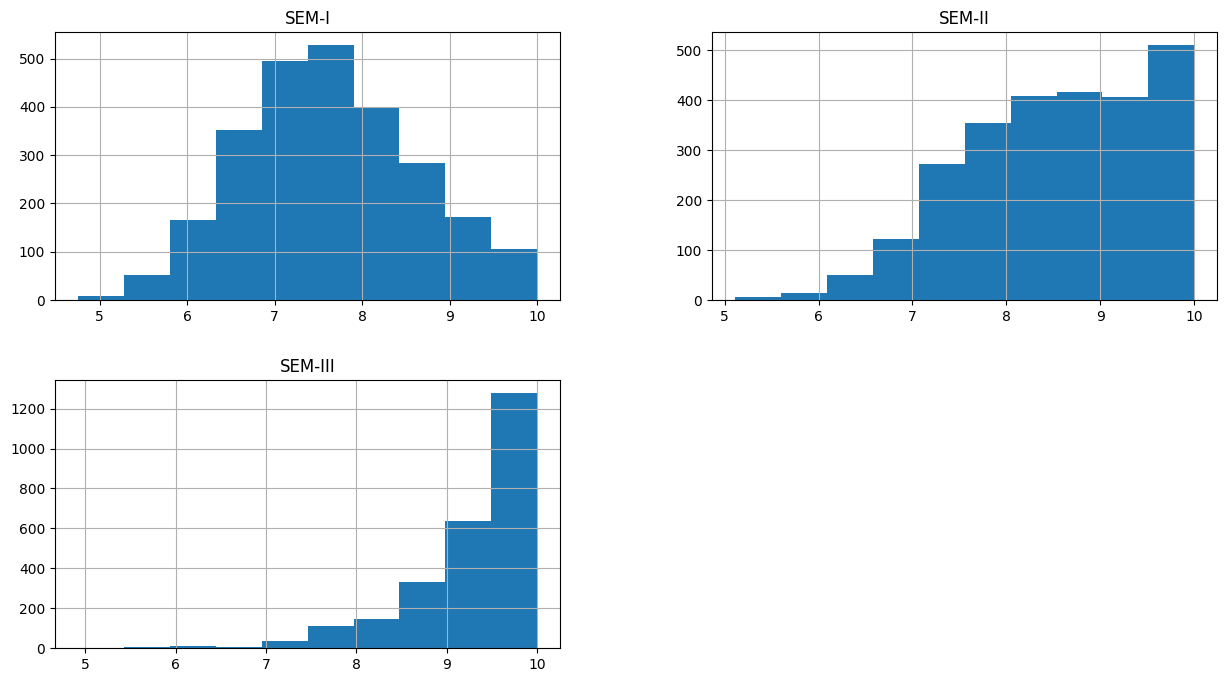

In [114]:
train_data.hist(figsize=(15,8))

<Axes: >

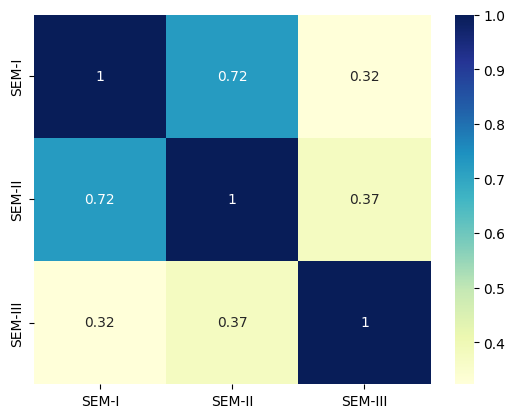

In [115]:
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='SEM-I', ylabel='SEM-II'>

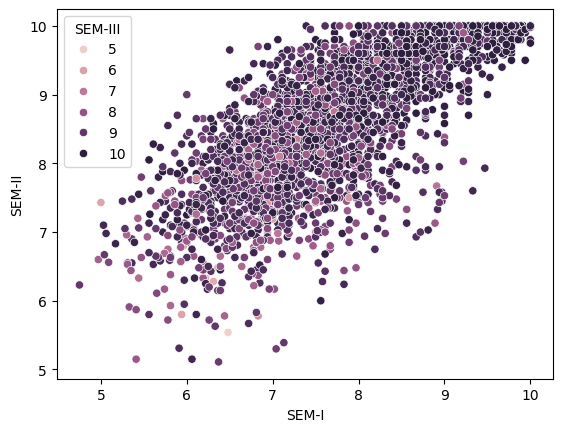

In [116]:
sns.scatterplot(x="SEM-I", y="SEM-II", data=train_data , hue='SEM-III')


In [117]:
from sklearn.linear_model import LinearRegression           #model -1
from sklearn.preprocessing import StandardScaler

X_train,y_train=train_data.drop(["SEM-III"],axis=1),train_data['SEM-III']

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

reg = LinearRegression()

reg.fit(X_train,y_train)

LinearRegression()

In [118]:
test_data=X_test.join(y_test)

In [119]:
reg.score(X_test,y_test)

0.14763758644852432

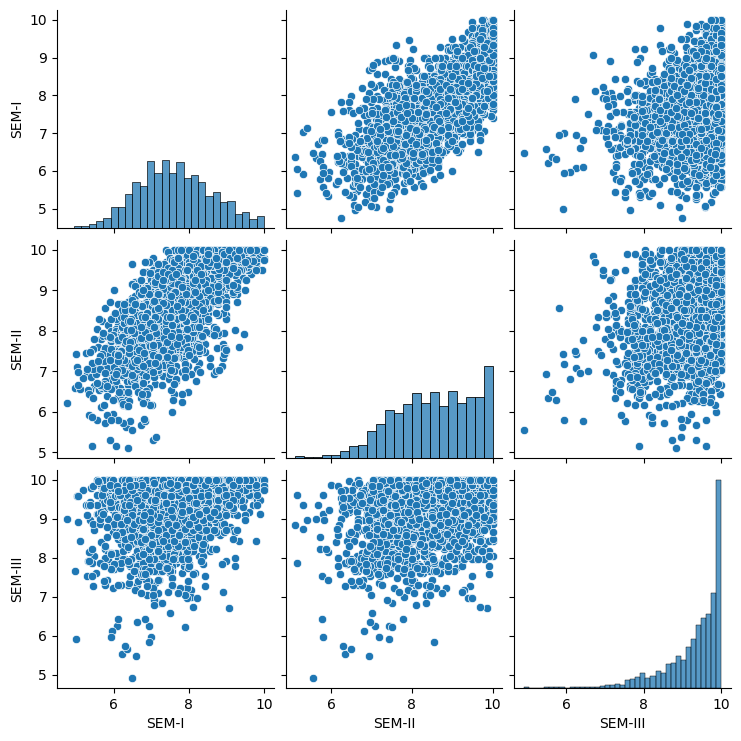

In [120]:

sns.pairplot(train_data[['SEM-I', 'SEM-II', 'SEM-III']])
plt.show()


In [121]:
from sklearn.preprocessing import PolynomialFeatures

poly_degrees = [3, 4]
for degree in poly_degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_s)
    X_test_poly = poly.transform(X_test_s)
    
    reg.fit(X_train_poly, y_train)
    reg.score(X_test_poly, y_test)
    score = reg.score(X_test_poly, y_test)
    print(f"Degree {degree}: R² Score = {score:.4f}")

Degree 3: R² Score = 0.1602
Degree 4: R² Score = 0.1554


In [122]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_s, y_train)
print("SVR R2 Score:", svr_model.score(X_test_s, y_test))


SVR R2 Score: 0.08690398611494865


In [123]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

for degree in [2, 3, 4]:
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(X_train_s, y_train)
    print(f"Polynomial Degree {degree} R2 Score:", poly_model.score(X_test_s, y_test))


Polynomial Degree 2 R2 Score: 0.16005279496836633
Polynomial Degree 3 R2 Score: 0.16016506530836938
Polynomial Degree 4 R2 Score: 0.15536680383418588
